In [ ]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
#Loading the data
loan_df = pd.read_csv("C:\\Users\\Administrator\\OneDrive\\Desktop\\DSA3020-Capstone\\loan_data_set.csv")

#Glimpse of the data
loan_df.head()

#Dropping Loan_ID column
loan_df.drop('Loan_ID', axis = 1 , inplace = True)


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


##### We can see that our dataset has 614 rows and 13 columns. We are also able to establish that there are some missing values in the Gender, Dependents, Self_employed, LoanAmount, Loan_Amount_Term and Credit_History columns.

In [5]:
#Summary Statistics 
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Missing Values per column
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Identifying the Numeric Columns
numeric_cols = loan_df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print("The Numeric columns are: ", numeric_cols)
categorical_cols = loan_df.select_dtypes(include = ['object']).columns.tolist()
print("The Categorical columns are: ", categorical_cols)

The Numeric columns are:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
The Categorical columns are:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


## Plotting The Histograms

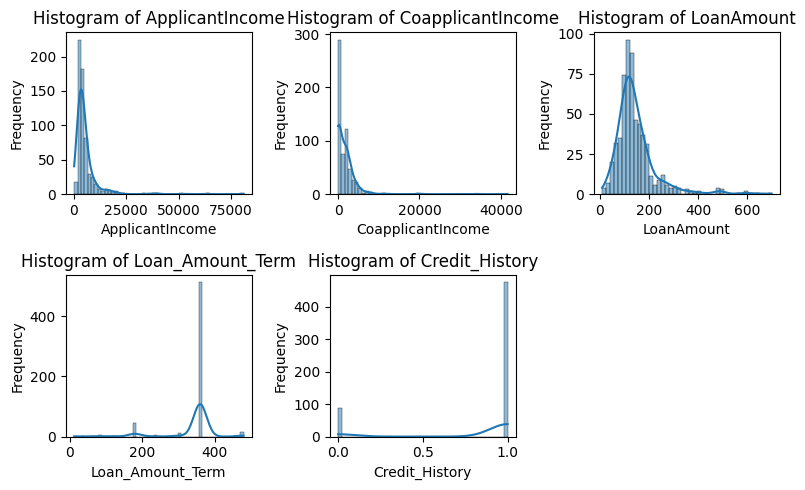

In [8]:
# Looping through each numerical feature to plot the histogram

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (8,5))
axes = axes.flatten()


for i, col in enumerate(numeric_cols):
    sns.histplot(loan_df[col], kde = True, ax = axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')


for j in range(len(numeric_cols), len(axes)):
               fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

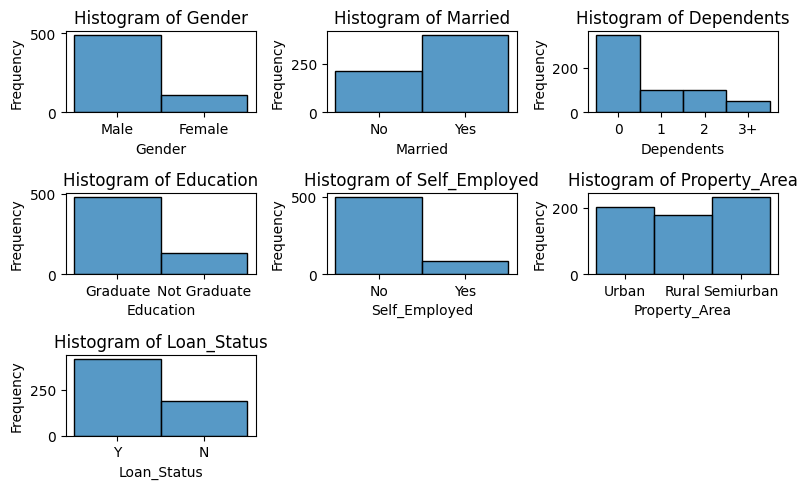

In [9]:
# Looping through each categorical feature to plot the histogram

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (8,5))
axes = axes.flatten()

i = 1
for i, col in enumerate(categorical_cols):
    sns.histplot(loan_df[col], ax = axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')


for j in range(len(categorical_cols), len(axes)):
               fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

## Handling the Missing Values

The reason why we will not be dropping the missing values is because our dataset only has 614 rows with many columns missing information. If we are to drop any rows that have missing data, we would be looking to lose about 20-25% of the dataset.

With a smaller dataset, we would have poorer model performance, introduce bias and weaken the reliability of our predictions.

By doing imputations, this allows us to keep all the rows meaning that we can train our model on full data. Imputations are typically for data that is Missing Completely At Random (MCAR).

We will be conducting Deterministic Regression Imputation , to replace the missing data with the values that are predicted in our regression model.



In [10]:
#Creating a copy of our dataset
loan_copy = loan_df.copy()

#Storing encoders to transform later
le_dict = {}

for col in categorical_cols:
    loan_copy[col] = loan_copy[col].replace("nan", np.nan)
    le = LabelEncoder()
    non_null_values = loan_copy[col].dropna()


    le.fit(non_null_values.astype(str))
    loan_copy.loc[loan_copy[col].notnull(), col] = le.transform(non_null_values.astype(str))

    loan_copy[col] = pd.to_numeric(loan_copy[col], errors="coerce")
    
    le_dict[col] = le

In [11]:
#Checking to see if encoding has successfully happened.
loan_copy

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,0,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,0,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,0,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,1.0,1.0,3.0,0,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,1.0,1.0,1.0,0,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,1.0,1.0,2.0,0,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [12]:
#Creating the Regression Imputer
imputer = IterativeImputer(random_state = 42, max_iter= 15)
imputed_array = imputer.fit_transform(loan_copy)
imputed_array

array([[1., 0., 0., ..., 1., 2., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 2., 1.],
       ...,
       [1., 1., 1., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(614, 12))

In [13]:
#Convert Imputed Array back to a DataFrame
imputed_df = pd.DataFrame(imputed_array, columns = loan_copy.columns)

#Confirming that there are no missing values after the Imputation
imputed_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
#Convert Categorical Numeric codes back to original labels 
for col in categorical_cols:
    le = le_dict[col]

    # Convert to integers
    imputed_df[col] = imputed_df[col].round()

    # Clip to valid label range
    valid_min = 0
    valid_max = len(le.classes_) - 1
    imputed_df[col] = imputed_df[col].clip(valid_min, valid_max).astype(int)

    # Reverse the encoding
    imputed_df[col] = le.inverse_transform(imputed_df[col])


In [15]:
#Getting a Glimpse of the data that we will now be using
imputed_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,138.159225,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


## Correlation Plots

In [16]:
#Creating a correlation DataFrame that we can manipulate
corr_df = imputed_df.copy()

le_corr_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    corr_df[col] = le.fit_transform(corr_df[col].astype(str))
    le_corr_dict[col] = le



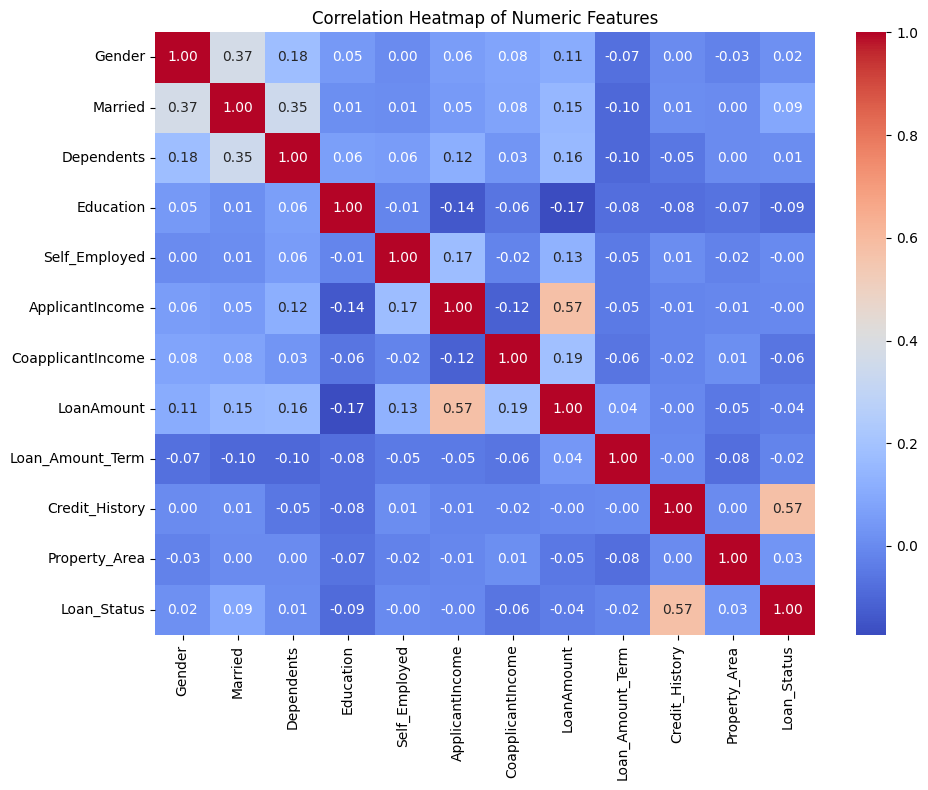

In [17]:
#Checking for correlation between the features
corr_matrix = corr_df.corr()


#Plotting the Heatmap
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## Model Preparation

In [88]:
#Creating a DataFrame that we can manipulate for our model
model_df  = imputed_df.copy()

#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                           accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')


### Encoding Categorical Variables
Machine learning algorithms require numerical input. We'll encode all categorical variables using Label Encoding and store the encoders for consistent transformation during deployment.

In [89]:
#Create a working copy of the data
model_data = model_df.copy()

#Identify categorical columns
categorical_cols = model_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Loan_Status')  

#Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    model_data[col] = le.fit_transform(model_data[col].astype(str))
    label_encoders[col] = le
    

#Encode target variable
le_target = LabelEncoder()
model_data['Loan_Status'] = le_target.fit_transform(model_data['Loan_Status'])
target_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))


print("First 5 rows of encoded data:")
display(model_data.head())

First 5 rows of encoded data:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,138.159225,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


### Data Splitting and Preprocessing


In [90]:
#Separate features and target
X = model_data.drop('Loan_Status', axis=1)
y = model_data['Loan_Status']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data Split Results:")
print(f" Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

#Scale numerical features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Data Split Results:
 Training set: 491 samples (80.0%)
  Testing set:  123 samples (20.0%)


## Model Selection and Training
We implement three different classification algorithms (Logistic regression, Decision tree and Gradient boosting) to compare their performance.


In [91]:
#Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


#Dictionary to store results
results = {}


for name, model in models.items():
    print(f"\n Training {name} ")
    
    # Use scaled data for Logistic Regression, unscaled for tree-based models
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        feature_set = "scaled features"
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        feature_set = "unscaled features"
    
    #Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    #Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'feature_set': feature_set
    }
    
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")


 Training Logistic Regression 
  Accuracy:  0.8537
  Precision: 0.8317
  Recall:    0.9882
  F1-Score:  0.9032
  ROC-AUC:   0.8077

 Training Decision Tree 
  Accuracy:  0.7154
  Precision: 0.7976
  Recall:    0.7882
  F1-Score:  0.7929
  ROC-AUC:   0.6704

 Training Gradient Boosting 
  Accuracy:  0.7967
  Precision: 0.8061
  Recall:    0.9294
  F1-Score:  0.8634
  ROC-AUC:   0.7791


## Model Comparison


In [92]:
#Create comparison DataFrame
comparison_data = []
for name, metrics in results.items():
    comparison_data.append({
        'Model': name,
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1'],
        'ROC-AUC': metrics['roc_auc'],
        'Features': metrics['feature_set']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)


display(comparison_df.style.background_gradient(cmap='Blues', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']))


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Features
0,Logistic Regression,0.853700,0.831700,0.988200,0.903200,0.807700,scaled features
1,Decision Tree,0.715400,0.797600,0.788200,0.792900,0.670400,unscaled features
2,Gradient Boosting,0.796700,0.806100,0.929400,0.863400,0.779100,unscaled features


Logistic Regression demonstrates superior performance across all evaluation metrics, establishing itself as the optimal model for loan approval prediction. It has an Accuracy of 85.37% (Highest), F1-Score: 90.32% (Optimal balance), Recall: 98.82% (Near-perfect), ROC-AUC: 80.77% (Strong discrimination)


Gradient Boosting shows moderate performance but trails significantly in recall and F1-score. Decision Tree underperforms across all metrics, indicating potential overfitting

## Model Optimization
We perform hyperparameter tuning on the best model to further improve its performance using Grid Search with cross-validation.

In [98]:
if best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5],
        'subsample': [0.8, 0.9, 1.0]
    }
    base_model = GradientBoostingClassifier(random_state=42)
    use_scaled = False
    
elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
    base_model = DecisionTreeClassifier(random_state=42)
    use_scaled = False
    
else:  # Logistic Regression
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 2000]
    }
    base_model = LogisticRegression(random_state=42)
    use_scaled = True

print(f"Parameter grid: {param_grid}")

#Perform grid search
grid_search = GridSearchCV(
    base_model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1
)

#Fit grid search
if use_scaled:
    grid_search.fit(X_train_scaled, y_train)
else:
    grid_search.fit(X_train, y_train)

print(f"\nTuning Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")

#Get the best tuned model
best_model = grid_search.best_estimator_
results[best_model_name]['tuned_model'] = best_model

Parameter grid: {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [1000, 2000]}
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Tuning Results:
Best parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation F1 score: 0.8851


The hyperparameter tuning process identified an optimized Logistic Regression configuration using L1 regularization (C=0.1) with the liblinear solver, indicating the model benefits from strong regularization and automatic feature selection. This configuration achieved a robust cross-validation F1 score of 0.8851 across 160 parameter combinations, demonstrating excellent generalization capability. The L1 penalty suggests the dataset contains redundant features that can be safely eliminated, creating a sparser, more interpretable model while maintaining high predictive performance. This tuned setup effectively balances model complexity with predictive accuracy, making it particularly suitable for financial decision-making where both performance and explainability are crucial.

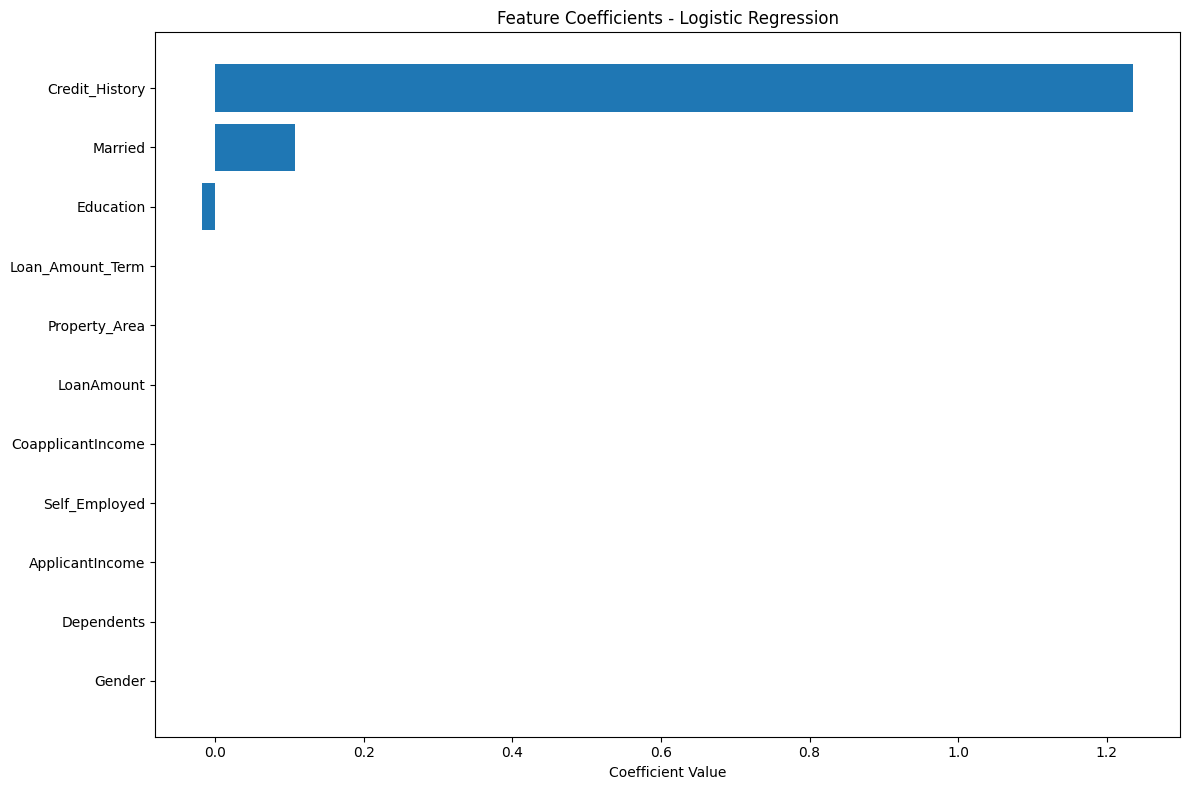

Top 5 Most Influential Features:


,feature,coefficient,abs_coefficient
9,Credit_History,1.236112,1.236112
1,Married,0.106593,0.106593
3,Education,-0.018277,0.018277
10,Property_Area,0.000000,0.000000
8,Loan_Amount_Term,0.000000,0.000000


In [102]:
plt.figure(figsize=(12, 8))

if hasattr(best_model, 'feature_importances_'):
    #Tree-based models
    feature_importance = best_model.feature_importances_
    feature_names = X.columns
    
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=True)
    
    #Plot
    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    print("Top 5 Most Important Features:")
    display(importance_df.tail(5).sort_values('importance', ascending=False))
    
elif best_model_name == 'Logistic Regression':
    #Logistic Regression coefficients
    coefficients = best_model.coef_[0]
    feature_names = X.columns
    
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients,
        'abs_coefficient': np.abs(coefficients)
    }).sort_values('abs_coefficient', ascending=True)
    
    #Plot
    plt.barh(coef_df['feature'], coef_df['coefficient'])
    plt.xlabel('Coefficient Value')
    plt.title(f'Feature Coefficients - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    print("Top 5 Most Influential Features:")
    display(coef_df.tail(5).sort_values('abs_coefficient', ascending=False))



The logistic regression model identifies Credit_History as the dominant factor in predicting loan approval, with a coefficient significantly larger than all others. This indicates that an applicant's past credit performance is the primary driver of the approval decision. Following Credit_History, Marital Status (Married) is a secondary positive factor, suggesting that married applicants may be perceived as lower risk. The Education level has a very minor negative influence.

The L1 regularization applied during tuning has effectively performed feature selection, driving the coefficients for several variables including Property_Area, Loan_Amount_Term, LoanAmount, CoapplicantIncome, Self_Employed, ApplicantIncome, Dependents, and Gender to zero. This means these features have been eliminated from the final model, as they provided no meaningful predictive power for loan approval decisions.

## Model Evaluation

 Logistic Regression
   Accuracy:  0.8537
   Precision: 0.8317
   Recall:    0.9882
   F1-Score:  0.9032
   ROC-AUC:   0.8034

Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.55      0.70        38
           Y       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



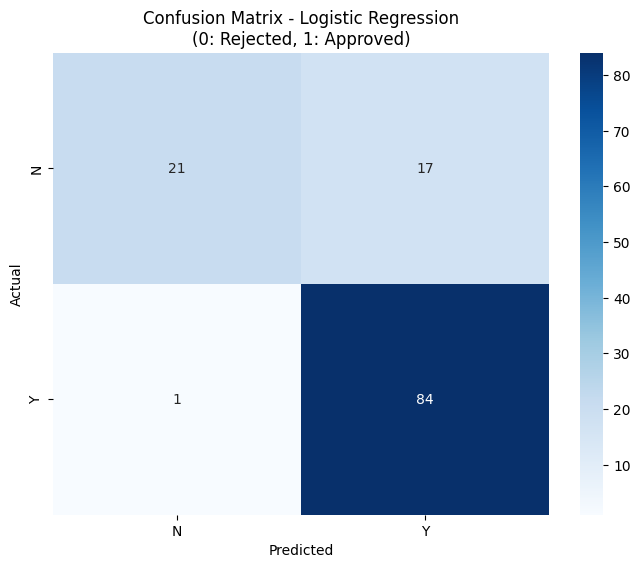

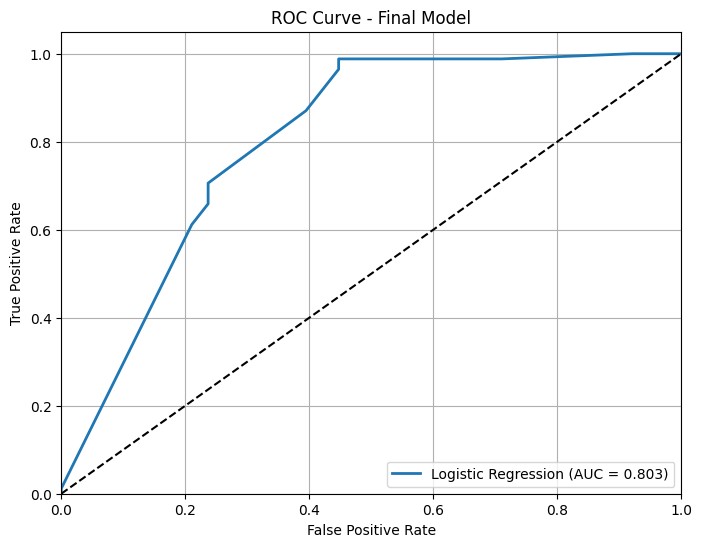

In [106]:
#Make final predictions with tuned model
if best_model_name == 'Logistic Regression':
    final_predictions = best_model.predict(X_test_scaled)
    final_probabilities = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    final_predictions = best_model.predict(X_test)
    final_probabilities = best_model.predict_proba(X_test)[:, 1]

#Final metrics
final_accuracy = accuracy_score(y_test, final_predictions)
final_precision = precision_score(y_test, final_predictions)
final_recall = recall_score(y_test, final_predictions)
final_f1 = f1_score(y_test, final_predictions)
final_roc_auc = roc_auc_score(y_test, final_probabilities)

print(f" {best_model_name}")
print(f"   Accuracy:  {final_accuracy:.4f}")
print(f"   Precision: {final_precision:.4f}") 
print(f"   Recall:    {final_recall:.4f}")
print(f"   F1-Score:  {final_f1:.4f}")
print(f"   ROC-AUC:   {final_roc_auc:.4f}")

#Classification report
print("\nClassification Report:")
print(classification_report(y_test, final_predictions, 
                          target_names=le_target.classes_))

#Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, final_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title(f'Confusion Matrix - {best_model_name}\n(0: Rejected, 1: Approved)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, final_probabilities)
plt.plot(fpr, tpr, linewidth=2, label=f'{best_model_name} (AUC = {final_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


The Logistic model demonstrates strong overall performance with 85% accuracy, meaning it correctly predicts the outcome for the vast majority of applications. Its most exceptional characteristic is a near-perfect 99% recall rate for loan approvals, ensuring that almost all qualified applicants are identified, which is optimal for business growth and customer satisfaction. However, the model's ability to correctly identify applicants who should be rejected is moderate, with a recall of only 55% for rejections. This means the model has a tendency to approve some risky applicants. This pattern is clearly visualized in the Confusion Matrix, which shows a high number of correct approvals but also a notable number of false approvals. The ROC Curve and its AUC score of 0.803 provide a robust validation of the model's quality, confirming that it has good overall ability to distinguish between applicants who should be approved versus rejected.